In [1]:
from IPython.core.display import HTML
def css_styling(filepath):
    styles = open(filepath, 'r').read()
    return HTML(styles)
css_styling('../styles/custom.css')

# Lift on a cylinder

Remember when we computed uniform flow past a doublet? The stream-line pattern produced flow around a cylinder. When studying the pressure coefficient, we realized that the drag on the cylinder was exactly zero, leading to the D'Alembert paradox.

What about lift? Is it possible for a perfectly circular cylinder to experience lift? What if the cylinder is rotating? Have you heard about the Magnus effect?

You might be surprised to learn that all we need to do is add a vortex in the center of the cylinder. Let's see how that looks.

First, we recall the equations for the flow of a doublet. In Cartesian coordinates, a doublet located at the origin has a stream function and velocity components given by

$$\psi\left(x,y\right) = -\frac{\kappa}{2\pi}\frac{y}{x^2+y^2}$$$$u\left(x,y\right) = \frac{\partial\psi}{\partial y} = -\frac{\kappa}{2\pi}\frac{x^2-y^2}{\left(x^2+y^2\right)^2}$$$$v\left(x,y\right) = -\frac{\partial\psi}{\partial x} = -\frac{\kappa}{2\pi}\frac{2xy}{\left(x^2+y^2\right)^2}$$

## Let's start computing

We'll place a doublet of strength $\kappa=1$ at the origin, and add a free stream $U_\infty=1$ (yes, we really like the number one). We can re-use the code we have written before; this is always a good thing.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
# embed the figures into the notebook
%matplotlib inline

In [13]:
N = 50                                # Number of points in each direction
x_start, x_end = -2.0, 2.0            # x-direction boundaries
y_start, y_end = -1.0, 1.0            # y-direction boundaries
x = np.linspace(x_start, x_end, N)    # computes a 1D-array for x
y = np.linspace(y_start, y_end, N)    # computes a 1D-array for y
X, Y = np.meshgrid(x, y)              # generates a mesh grid

In [14]:
kappa = 1
u_inf = 1
x_doublet, y_doublet = 0, 0

In [15]:
def get_velocity_doublet(strength, xd, yd, X, Y):
    """
    Returns the velocity field generated by a doublet.
    
    Parameters
    ----------
    strength: float
        Strength of the doublet.
    xd: float
        x-coordinate of the doublet.
    yd: float
        y-coordinate of the doublet.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    u = (-strength / (2 * np.pi) *
         ((X - xd)**2 - (Y - yd)**2) /
         ((X - xd)**2 + (Y - yd)**2)**2)
    v = (-strength / (2 * np.pi) *
         2 * (X - xd) * (Y - yd) /
         ((X - xd)**2 + (Y - yd)**2)**2)
    
    return u, v

def get_streamfunction_doublet(strength, xd, yd, X, Y):
    """
    Returns the stream-function generated by a doublet.
    
    Parameters
    ----------
    strength: float
        Strength of the doublet.
    xd: float
        x-coordinate of the doublet.
    yd: float
        y-coordinate of the doublet.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    psi: 2D Numpy array of floats
        The stream-function.
    """
    psi = -strength / (2 * np.pi) * (Y - yd) / ((X - xd)**2 + (Y - yd)**2)
    
    return psi

In [16]:
# compute the velocity field on the mesh grid
u_doublet, v_doublet = get_velocity_doublet(kappa, x_doublet, y_doublet, X, Y)

# compute the stream-function on the mesh grid
psi_doublet = get_streamfunction_doublet(kappa, x_doublet, y_doublet, X, Y)

# freestream velocity components
u_freestream = u_inf * np.ones((N, N), dtype=float)
v_freestream = np.zeros((N, N), dtype=float)

# stream-function of the freestream flow
psi_freestream = u_inf * Y

# superposition of the doublet on the freestream flow
u = u_freestream + u_doublet
v = v_freestream + v_doublet
psi = psi_freestream + psi_doublet

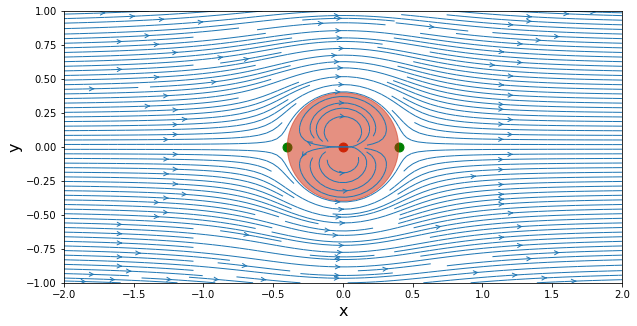

In [21]:
# plot the streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
plt.figure(figsize=(width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.scatter(x_doublet, y_doublet, color='#CD2305', s=80, marker='o')

# calculate the cylinder radius and add the cylinder to the figure
R = np.sqrt(kappa / (2 * np.pi * u_inf))
circle = plt.Circle((0, 0), radius=R, color='#CD2305', alpha=0.5)
plt.gca().add_patch(circle)

# calculate the stagnation points and add them to the figure
x_stagn1, y_stagn1 = +np.sqrt(kappa / (2 * np.pi * u_inf)), 0.0
x_stagn2, y_stagn2 = -np.sqrt(kappa / (2 * np.pi * u_inf)), 0.0
plt.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2],
               color='g', s=80, marker='o');

Nice! We have cylinder flow.

Now, let's add a vortex located at the origin with a positive strength $\Gamma$. In Cartesian coordinates, the stream function and velocity components are given by:

$$\psi\left(x,y\right) = \frac{\Gamma}{4\pi}\ln\left(x^2+y^2\right)$$$$u\left(x,y\right) = \frac{\Gamma}{2\pi}\frac{y}{x^2+y^2} \qquad v\left(x,y\right) = -\frac{\Gamma}{2\pi}\frac{x}{x^2+y^2}$$

In [23]:
Gamma = 4.0                      # strength of the vortex
x_vortex, y_vortex = 0.0, 0.0    # location of the vortex

In [27]:
def get_velocity_vortex(strength, xv, yv, X, Y):
    """
    Returns the velocity field generated by a vortex.
    
    Parameters
    ----------
    strength: float
        Strength of the vortex.
    xv: float
        x-coordinate of the vortex.
    yv: float
        y-coordinate of the vortex.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    u = +strength/(2*np.pi)*(Y - yv)/((X - xv)**2 + (Y - yv)**2)
    v = -strength/(2*np.pi)*(X - xv)/((X - xv)**2 + (Y - yv)**2)
    
    return u, v

def get_streamfunction_vortex(strength, xv, yv, X, Y):
    """
    Returns the stream-function generated by a vortex.
    
    Parameters
    ----------
    strength: float
        Strength of the vortex.
    xv: float
        x-coordinate of the vortex.
    yv: float
        y-coordinate of the vortex.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    psi: 2D Numpy array of floats
        The stream-function.
    """
    psi = strength / (4 * np.pi) * np.log((X - xv)**2 + (Y - yv)**2)
    
    return psi

In [28]:
# compute the velocity field on the mesh grid
u_vortex, v_vortex = get_velocity_vortex(Gamma, x_vortex, y_vortex, X, Y)

# compute the stream-function on the mesh grid
psi_vortex = get_streamfunction_vortex(Gamma, x_vortex, y_vortex, X, Y)

Now that we have all the necessary ingredients (uniform flow, doublet and vortex), we apply the principle of superposition, and then we make a nice plot.

In [29]:
# superposition of the doublet and the vortex on the freestream flow
u = u_freestream + u_doublet + u_vortex
v = v_freestream + v_doublet + v_vortex
psi = psi_freestream + psi_doublet + psi_vortex

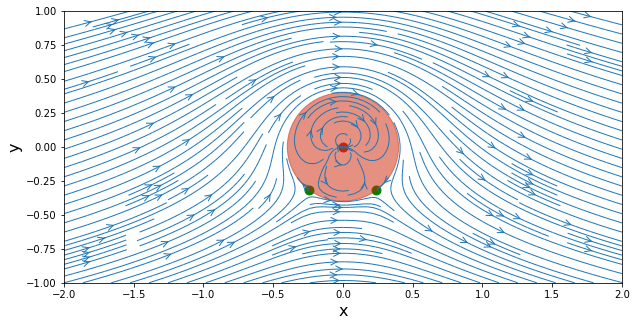

In [32]:
# calculate the cylinder radius
R = np.sqrt(kappa/(2*np.pi*u_inf))

# calculate the stagnation points
x_stagn1, y_stagn1 = (+np.sqrt(R**2 - (Gamma/(4*np.pi*u_inf))**2),
                      -Gamma/(4*np.pi * u_inf))
x_stagn2, y_stagn2 = (-np.sqrt(R**2 - (Gamma/(4*np.pi*u_inf))**2),
                      -Gamma/(4*np.pi*u_inf))

# plot the streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start)*width
plt.figure(figsize=(width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u, v,
                  density=2, linewidth=1, arrowsize=1.5, arrowstyle='->')
circle = plt.Circle((0.0, 0.0), radius=R, color='#CD2305', alpha=0.5)
plt.gca().add_patch(circle)
plt.scatter(x_vortex, y_vortex, color='#CD2305', s=80, marker='o')
plt.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2],
               color='g', s=80, marker='o');

### Challenge task

The challenge task in the doublet notebook was to calculate the radius of the cylinder created by the doublet in a uniform flow. You should have gotten

$$R = \sqrt{\frac{\kappa}{2\pi U_\infty}}$$
The new challenge is to find where the stagnation points are located on the surface of the cylinder, when there's a vortex. (You just need an expression for the angles.)

What hapens if $\frac{\Gamma}{4\pi U_\infty R} >1$?

Go back and experiment with a value of $\Gamma$ that causes this.

The stagnation points will be calculated as conventionally, i.e. by setting the velocity componets to zero,

$$\psi = U_\infty r \sin\theta - \frac{\kappa}{2\pi r}\sin\theta + \frac{\Gamma}{2\pi r},$$

$$u_r = \frac{1}{\theta}\frac{\partial \psi}{\theta} = U_\infty\cos\theta - \frac{\kappa}{2\pi r^2}\cos\theta = 0,$$

$$u_\theta = -\frac{\partial \psi}{r} = -U_\infty\sin\theta + \frac{\kappa}{2\pi r^2}\sin\theta - \frac{\Gamma}{2\pi r} = 0.$$

The solution of this equation is

$$r = \sqrt{\frac{\kappa}{2\pi U_\infty}}\equiv R,$$

$$\theta = -\arcsin{\frac{\Gamma}{2\pi R \left(U_\infty + \frac{\kappa}{2\pi R^2}\right)}} = -\arcsin{\frac{\Gamma}{4\pi R U_\infty}} .$$

For instance, if we desired to have the stagnation point at the front and rear part of the cylinder ($\theta = 0, \pi$) we'd recover the solution without circulation obtaining $\Gamma = 0$ from the latest equation,

$$\Gamma = -4\pi R U_\infty \sin\theta.$$

Another interesting aspect of the $\theta$ equation is that mathematically the argument of the $\arcsin$ is limited to be between -1 and 1, and so on the circulation

$$-{4\pi R U_\infty} \leq {\Gamma} \leq {4\pi R U_\infty}$$


In [49]:
R = np.sqrt(kappa/(2*np.pi*u_inf))
Gamma0 = -1.25*4*np.pi*R*u_inf

In [50]:
# compute the velocity field on the mesh grid
u_vortex, v_vortex = get_velocity_vortex(Gamma0, x_vortex, y_vortex, X, Y)

# compute the stream-function on the mesh grid
psi_vortex = get_streamfunction_vortex(Gamma0, x_vortex, y_vortex, X, Y)

In [51]:
# superposition of the doublet and the vortex on the freestream flow
u = u_freestream + u_doublet + u_vortex
v = v_freestream + v_doublet + v_vortex
psi = psi_freestream + psi_doublet + psi_vortex

<ipython-input-52-8d4341daf5ed>:2: RuntimeWarning: invalid value encountered in sqrt
  x_stagn1, y_stagn1 = (+np.sqrt(R**2 - (Gamma0/(4*np.pi*u_inf))**2),
<ipython-input-52-8d4341daf5ed>:4: RuntimeWarning: invalid value encountered in sqrt
  x_stagn2, y_stagn2 = (-np.sqrt(R**2 - (Gamma0/(4*np.pi*u_inf))**2),


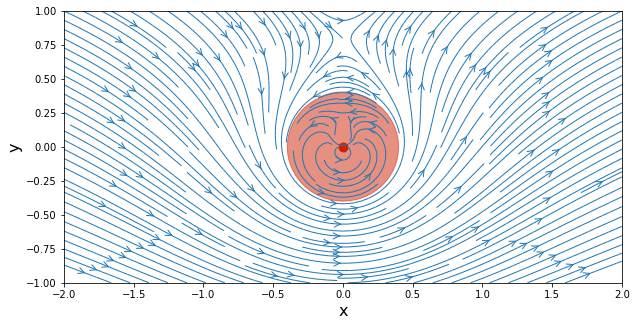

In [52]:
# calculate the stagnation points
x_stagn1, y_stagn1 = (+np.sqrt(R**2 - (Gamma0/(4*np.pi*u_inf))**2),
                      -Gamma0/(4*np.pi * u_inf))
x_stagn2, y_stagn2 = (-np.sqrt(R**2 - (Gamma0/(4*np.pi*u_inf))**2),
                      -Gamma0/(4*np.pi*u_inf))

# plot the streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start)*width
plt.figure(figsize=(width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u, v,
                  density=2, linewidth=1, arrowsize=1.5, arrowstyle='->')
circle = plt.Circle((0.0, 0.0), radius=R, color='#CD2305', alpha=0.5)
plt.gca().add_patch(circle)
plt.scatter(x_vortex, y_vortex, color='#CD2305', s=80, marker='o')
plt.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2],
               color='g', s=80, marker='o');

It can be noticed that if $\Gamma$ exceeds its limiting value then the velocities acquire imaginary values and the stagnation point is moved out of the cylinder surface along $\theta = \pm \pi/2$.